In [1]:
import pandas as pd 
df=pd.read_csv("c:/data/concrete/concrete.csv")
print(df.head())

   cement   flag    ash  water  superplastic  coarseagg  findagg  age  \
0   164.2    0.0  200.1  181.2          12.6      849.3    846.0   28   
1   164.0    0.0  200.0  181.0          13.0      849.0    846.0   28   
2   158.0    0.0  195.0  220.0          11.0      898.0    713.0   28   
3   144.0   15.0  195.0  176.0           6.0     1021.0    709.0   28   
4   167.0  187.0  195.0  185.0           7.0      898.0    636.0   28   

   strength  class  
0     15.09      0  
1     15.09      0  
2      8.54      0  
3     15.34      0  
4     23.89      0  


In [2]:
df.columns

Index(['cement', 'flag', 'ash', 'water', 'superplastic', 'coarseagg',
       'findagg', 'age', 'strength', 'class'],
      dtype='object')

In [3]:
df.shape

(1030, 10)

In [4]:
df.describe()

,cement,flag,ash,water,superplastic,coarseagg,findagg,age,strength,class
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961,0.492233
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742,0.500183
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,0.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000,0.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000,0.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000,1.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,1.000000


In [5]:
df.groupby("class").mean()

,cement,flag,ash,water,superplastic,coarseagg,findagg,age,strength
class,,,,,,,,,
0,239.668451,67.399235,58.713002,185.545698,4.612811,981.637667,788.107648,24.135755,22.578948
1,323.976923,80.597436,49.520907,177.463314,7.846746,963.925049,758.594872,67.867850,49.474773


In [6]:
df["class"].value_counts()

0    523
1    507
Name: class, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0:약함, 1: 강함)')

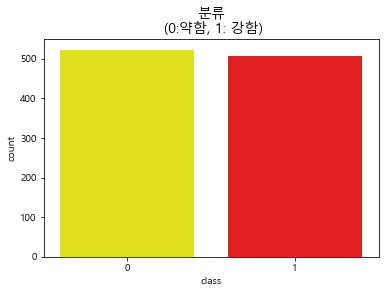

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
colors=["yellow","red"]
sns.countplot('class',data=df, palette=colors)
plt.title('분류\n (0:약함, 1: 강함)',fontsize=14)

In [8]:
train_cols=df.columns[0:8]
X=df[train_cols]
y=df["class"]
print(type(X), type(y))
print(X.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
   cement   flag    ash  water  superplastic  coarseagg  findagg  age
0   164.2    0.0  200.1  181.2          12.6      849.3    846.0   28
1   164.0    0.0  200.0  181.0          13.0      849.0    846.0   28
2   158.0    0.0  195.0  220.0          11.0      898.0    713.0   28
3   144.0   15.0  195.0  176.0           6.0     1021.0    709.0   28
4   167.0  187.0  195.0  185.0           7.0      898.0    636.0   28
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


array([[<AxesSubplot:xlabel='cement', ylabel='cement'>,
        <AxesSubplot:xlabel='flag', ylabel='cement'>,
        <AxesSubplot:xlabel='ash', ylabel='cement'>,
        <AxesSubplot:xlabel='water', ylabel='cement'>,
        <AxesSubplot:xlabel='superplastic', ylabel='cement'>,
        <AxesSubplot:xlabel='coarseagg', ylabel='cement'>,
        <AxesSubplot:xlabel='findagg', ylabel='cement'>,
        <AxesSubplot:xlabel='age', ylabel='cement'>,
        <AxesSubplot:xlabel='strength', ylabel='cement'>,
        <AxesSubplot:xlabel='class', ylabel='cement'>],
       [<AxesSubplot:xlabel='cement', ylabel='flag'>,
        <AxesSubplot:xlabel='flag', ylabel='flag'>,
        <AxesSubplot:xlabel='ash', ylabel='flag'>,
        <AxesSubplot:xlabel='water', ylabel='flag'>,
        <AxesSubplot:xlabel='superplastic', ylabel='flag'>,
        <AxesSubplot:xlabel='coarseagg', ylabel='flag'>,
        <AxesSubplot:xlabel='findagg', ylabel='flag'>,
        <AxesSubplot:xlabel='age', ylabel='flag'>,
    

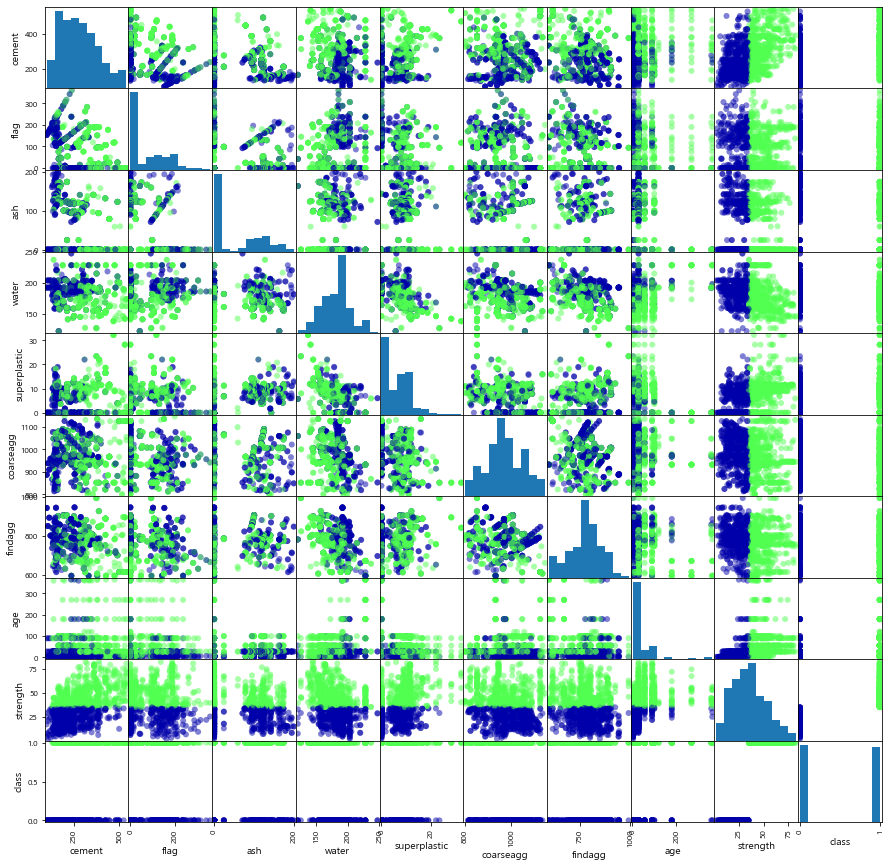

In [9]:
import mglearn
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15),marker='o',cmap=mglearn.cm3)

In [10]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [11]:
df_samp["class"].value_counts()

0    507
1    507
Name: class, dtype: int64

In [12]:
train_cols=df_samp.columns[0:8]
X=df_samp[train_cols]
y=df_samp["class"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y,random_state=10)

In [14]:
from tensorflow.keras import Sequential
from keras.layers.core import Dense

class MyModel(Sequential):
    def __init__(self, input_nodes, hidden_layers,num_classes):
        super(MyModel, self).__init__(name='my_model')
        self.num_classes=num_classes
        self.add(Dense(hidden_layers[0],input_shape=(input_nodes,),activation='relu'))
        self.add(Dense(hidden_layers[1],activation='relu'))
        self.add(Dense(hidden_layers[2],activation='relu'))
        self.add(Dense(num_classes, activation='sigmoid'))
model=MyModel(len(X_train.columns),[128,64,32],1)
model.compile(optimizer="adam",loss='mse', metrics=['accuracy'])

<AxesSubplot:>

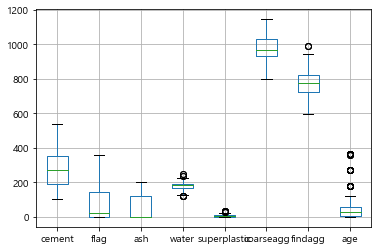

In [15]:
X_train.boxplot()

<AxesSubplot:>

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


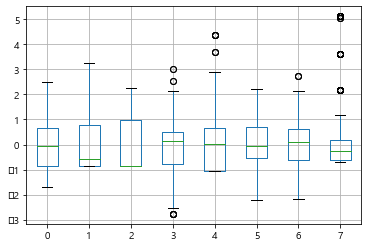

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)
X_train_scaled.boxplot()

In [17]:
hist=model.fit(X_train_scaled,y_train,epochs=500)

Epoch 1/500
26/26 [==============================] - 0s 882us/step - loss: 0.1941 - accuracy: 0.7781
Epoch 2/500
26/26 [==============================] - 0s 702us/step - loss: 0.1311 - accuracy: 0.8360
Epoch 3/500
26/26 [==============================] - 0s 859us/step - loss: 0.1101 - accuracy: 0.8570
Epoch 4/500
26/26 [==============================] - 0s 763us/step - loss: 0.1006 - accuracy: 0.8779
Epoch 5/500
26/26 [==============================] - 0s 915us/step - loss: 0.0979 - accuracy: 0.8693
Epoch 6/500
26/26 [==============================] - 0s 929us/step - loss: 0.0925 - accuracy: 0.8816
Epoch 7/500
26/26 [==============================] - 0s 791us/step - loss: 0.0892 - accuracy: 0.8804
Epoch 8/500
26/26 [==============================] - 0s 888us/step - loss: 0.0873 - accuracy: 0.8878
Epoch 9/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.8890
Epoch 10/500
26/26 [==============================] - 0s 943us/step - loss: 0.0817 - accuracy

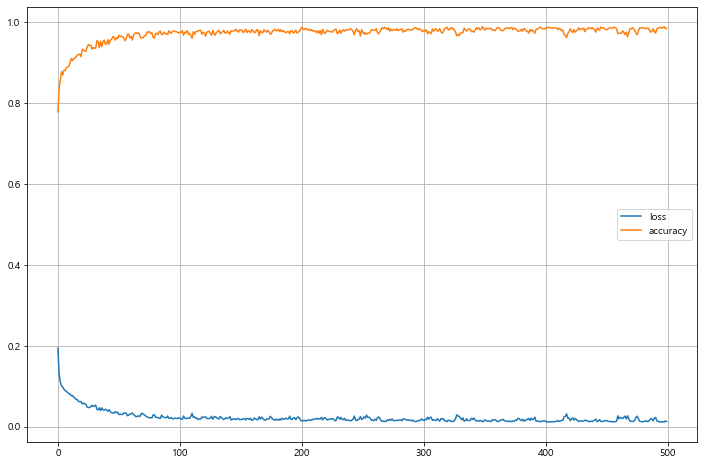

In [18]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [19]:
scores=model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

scores=model.evaluate(X_test_scaled,y_test,verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

26/26 [==============================] - 0s 634us/step - loss: 0.0115 - accuracy: 0.9877
[0.011541546322405338, 0.9876695275306702]
accuracy: 98.77%
7/7 [==============================] - 0s 849us/step - loss: 0.0711 - accuracy: 0.9261
[0.07111039012670517, 0.9261083602905273]
accuracy: 92.61%


In [20]:
pred=model.predict(X_test_scaled)
print(pred[0])
y_pred=[]
for pr in pred:
    if pr>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(y_pred)

[1.]
[1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test, y_pred)

array([[93,  8],
       [ 7, 95]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       101
           1       0.92      0.93      0.93       102

    accuracy                           0.93       203
   macro avg       0.93      0.93      0.93       203
weighted avg       0.93      0.93      0.93       203

